Henrique Olo Bardeja 81815270

Gabriel cardoso da silva 818136132

Iuri Moura da Silva 818143167

Wagner Alves de Melo 818137692

Lucas Venceslau dos Santos Soares 818221111

Danilo Yuudi Hirata 819228171

# Atividade 1
## Crie um dataset simples e comente os resultados obtidos com a técnica de KNN.

In [160]:
# Primeira Característica
clima=['Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso', 'Chuvoso', 'Chuvoso', 'Nublado',
'Ensolarado', 'Ensolarado', 'Chuvoso', 'Ensolarado', 'Nublado', 'Nublado', 'Chuvoso']
print(clima)

# Segunda Característica
temp=['Quente', 'Quente', 'Quente', 'Suave', 'Legal', 'Legal', 'Legal', 'Suave',
'Legal', 'Suave', 'Suave', 'Suave', 'Quente', 'Suave']
print(temp)

# Variavel alvo
brincar=['Não','Não','Sim','Sim','Sim','Não','Sim','Não','Sim','Sim','Sim','Sim','Sim','Não']
print(brincar)

['Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso', 'Chuvoso', 'Chuvoso', 'Nublado', 'Ensolarado', 'Ensolarado', 'Chuvoso', 'Ensolarado', 'Nublado', 'Nublado', 'Chuvoso']
['Quente', 'Quente', 'Quente', 'Suave', 'Legal', 'Legal', 'Legal', 'Suave', 'Legal', 'Suave', 'Suave', 'Suave', 'Quente', 'Suave']
['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não']


In [161]:
# Importando LabelEncoder
from sklearn import preprocessing
#criando labelEncoder
le = preprocessing.LabelEncoder()

# Convertendo string labels para numeros.
clima_encoded = le.fit_transform(clima)
print(clima_encoded)

temp_encoded = le.fit_transform(temp)
print(temp_encoded)

# convertendo string labels para numeros
alvo = le.fit_transform(brincar)
print(alvo)

# Combinando clima e temp em um unica lista de tuplas
carac=list(zip(clima_encoded,temp_encoded))
carac

[1 1 2 0 0 0 2 1 1 0 1 2 2 0]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


[(1, 1),
 (1, 1),
 (2, 1),
 (0, 2),
 (0, 0),
 (0, 0),
 (2, 0),
 (1, 2),
 (1, 0),
 (0, 2),
 (1, 2),
 (2, 2),
 (2, 1),
 (0, 2)]

In [162]:
base=list(zip(clima,temp,brincar))
print(base)

[('Ensolarado', 'Quente', 'Não'), ('Ensolarado', 'Quente', 'Não'), ('Nublado', 'Quente', 'Sim'), ('Chuvoso', 'Suave', 'Sim'), ('Chuvoso', 'Legal', 'Sim'), ('Chuvoso', 'Legal', 'Não'), ('Nublado', 'Legal', 'Sim'), ('Ensolarado', 'Suave', 'Não'), ('Ensolarado', 'Legal', 'Sim'), ('Chuvoso', 'Suave', 'Sim'), ('Ensolarado', 'Suave', 'Sim'), ('Nublado', 'Suave', 'Sim'), ('Nublado', 'Quente', 'Sim'), ('Chuvoso', 'Suave', 'Não')]


In [163]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=3) # pegando os três vizinhos mais proximos

# Treinando o modelo usando os ajustes de treinamento.
modelo.fit(carac,alvo)

#Predito
predito = modelo.predict([[0,2]]) # 0:Nublado, 2:Suave
print(predito)

predito = modelo.predict([[1,1]]) # 1:Ensolarado, 1:Quente
print(predito)

[1]
[0]


# Atividade 2
## Aplique os passos descritos na atividade 2 no dataset do Titanic, entre com os dados de cada integrante do grupo e comente os resultados obtidos.

In [164]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [165]:
# lendo titanic_data.csv
td = pd.read_csv('titanic_data.csv', sep=',')
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [166]:
# criando função para inserir idade faltante
def insert_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [167]:
# aplicando a função aos dataFrame
td['Age'] = td[['Age','Pclass']].apply(insert_age,axis=1)

#td['Age'].median()

# Fare (só um exemplo)
fare_median = td['Fare'].median()
td['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = td['Embarked'].value_counts()[0]
td['Embarked'].fillna(embarked_top, inplace=True)

In [168]:
# criando o dataframe sex com a coluna 'Sex' convertida para valores numéricos
sex = pd.get_dummies(td['Sex'],drop_first=True)
print (sex)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]


In [169]:
# criando o dataframe embark com a coluna 'Embarked' convertida para valores numéricos
embark = pd.get_dummies(td['Embarked'],drop_first=True)
print (embark)

     C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]


In [170]:
# Excluindo as colunas ['PassengerId', 'Name', 'Ticket', 'Cabin']
td.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1,inplace=True)

In [171]:
# Eliminando as colunas Sex e Embarked
td.drop(['Sex','Embarked'],axis=1,inplace=True)

In [172]:
# concatendo df com sex e embark
td = pd.concat([td,sex,embark],axis=1)

In [173]:
# Exibindo as colunas
td.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'C', 'Q',
       'S'],
      dtype='object')

In [174]:
# contando os valores faltantes
td.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
C           0
Q           0
S           0
dtype: int64

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(td.drop('Survived',axis=1), td['Survived'])

In [176]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [177]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0])

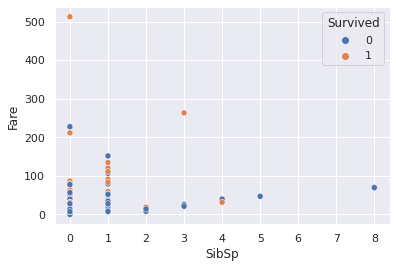

In [178]:
sns.scatterplot(
  x='SibSp',
  y='Fare',
  hue='Survived',
  data=X_test.join(y_test, how='outer')
)

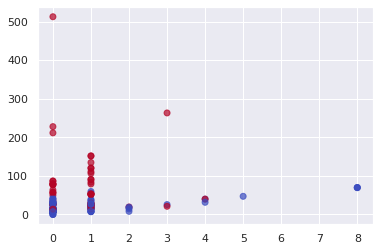

In [179]:
plt.scatter(
  X_test['SibSp'],
  X_test['Fare'],
  c=y_pred,
  cmap='coolwarm',
  alpha=0.7
)

# Atividade 3
## Utilize a ideia da atividade 3 e descubra a média com desvio padrão e o histograma de acurácia para 1000 treinamentos dos algoritmos de KNN aplicado no dataset do câncer de mama e no do Titanic.

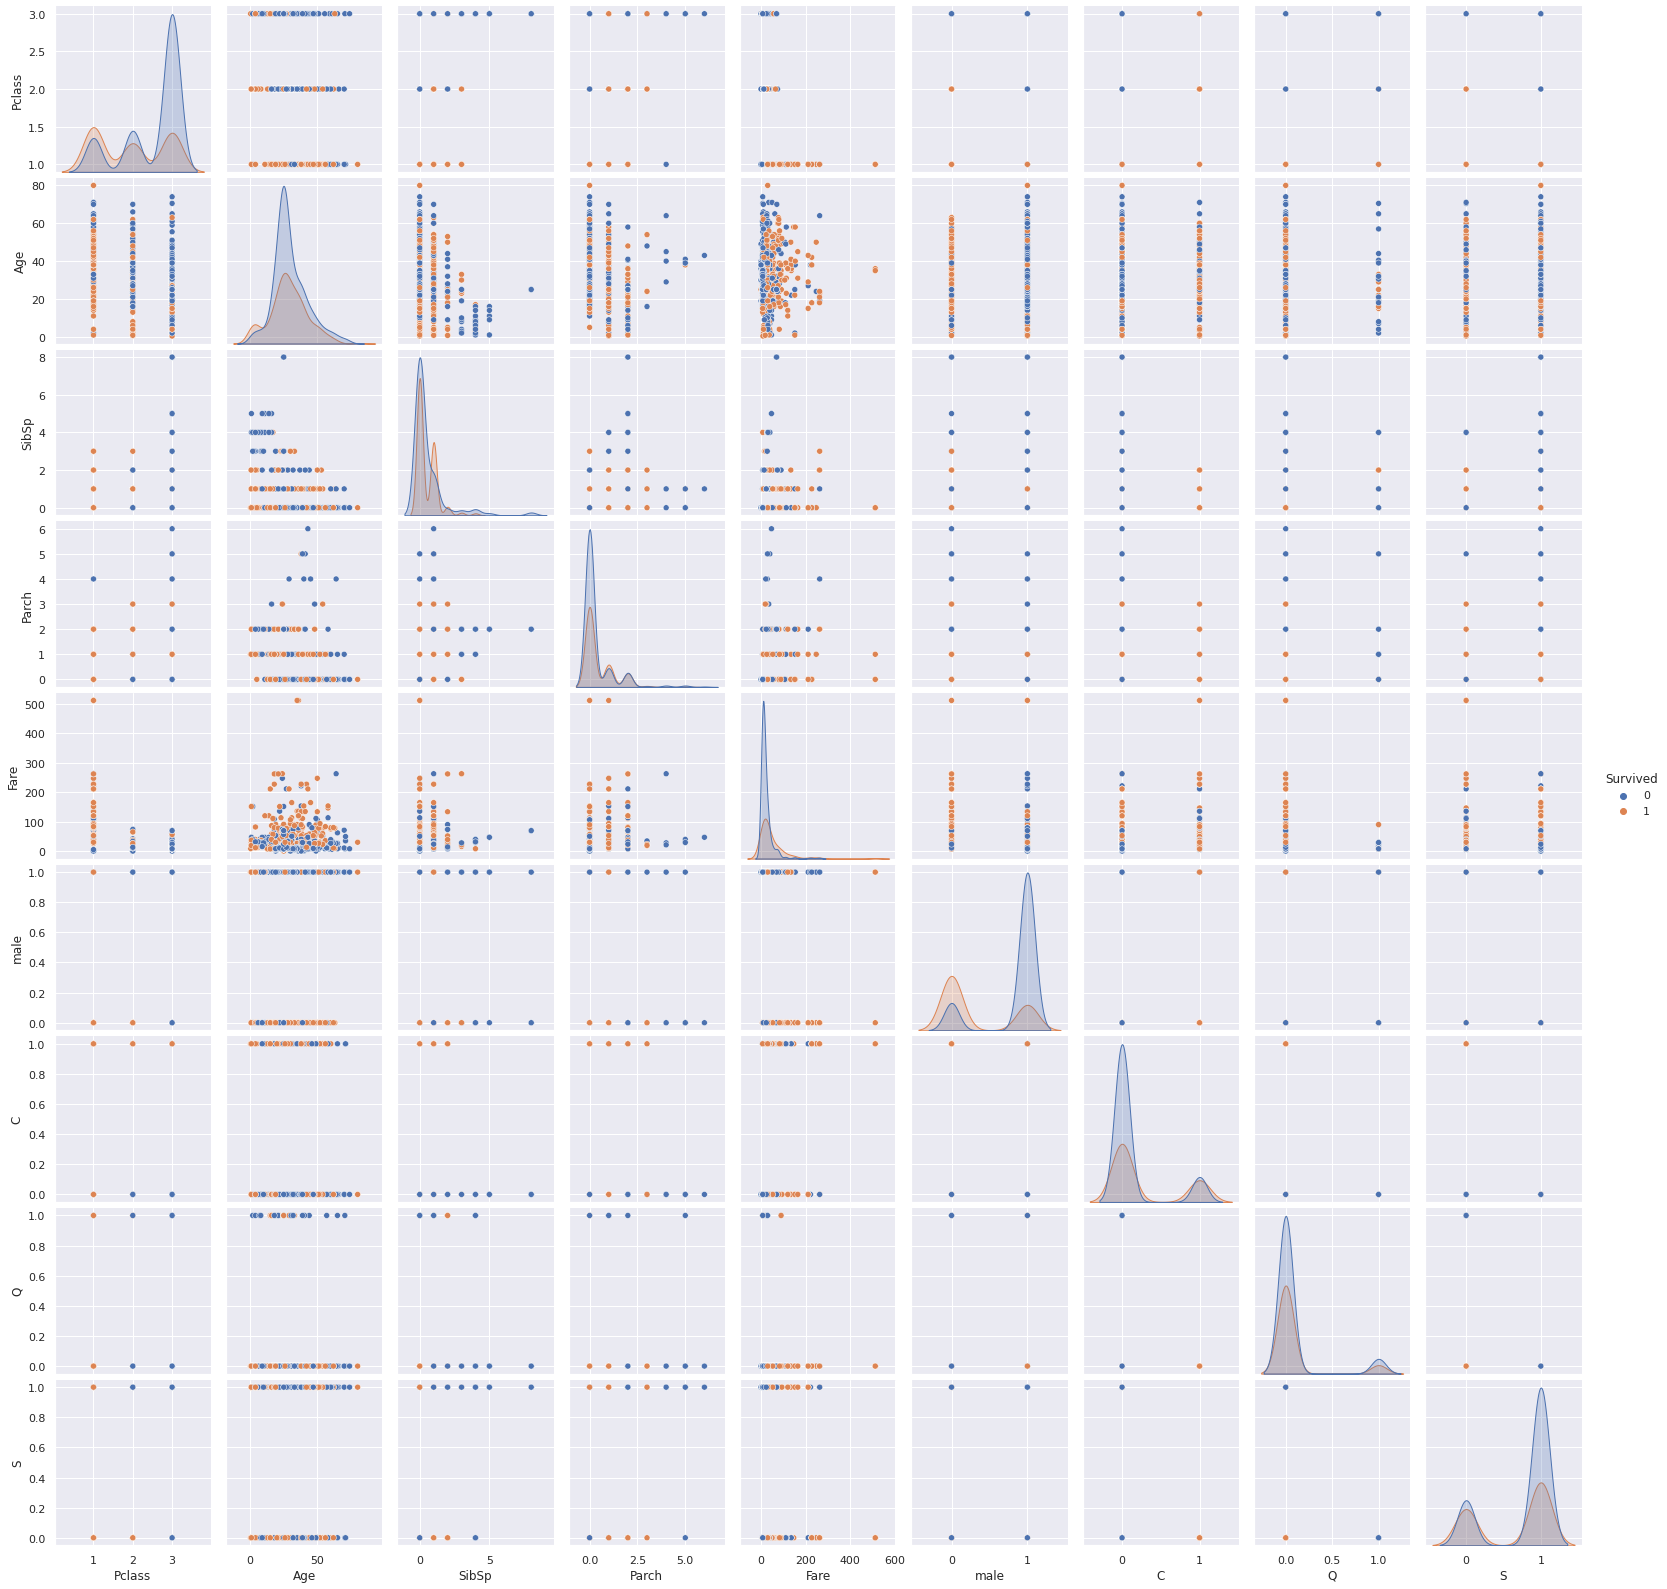

In [180]:
# mostra graficos
sns.pairplot(td, hue='Survived')
plt.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4a41840d08> (for post_execute):


KeyboardInterrupt: ignored

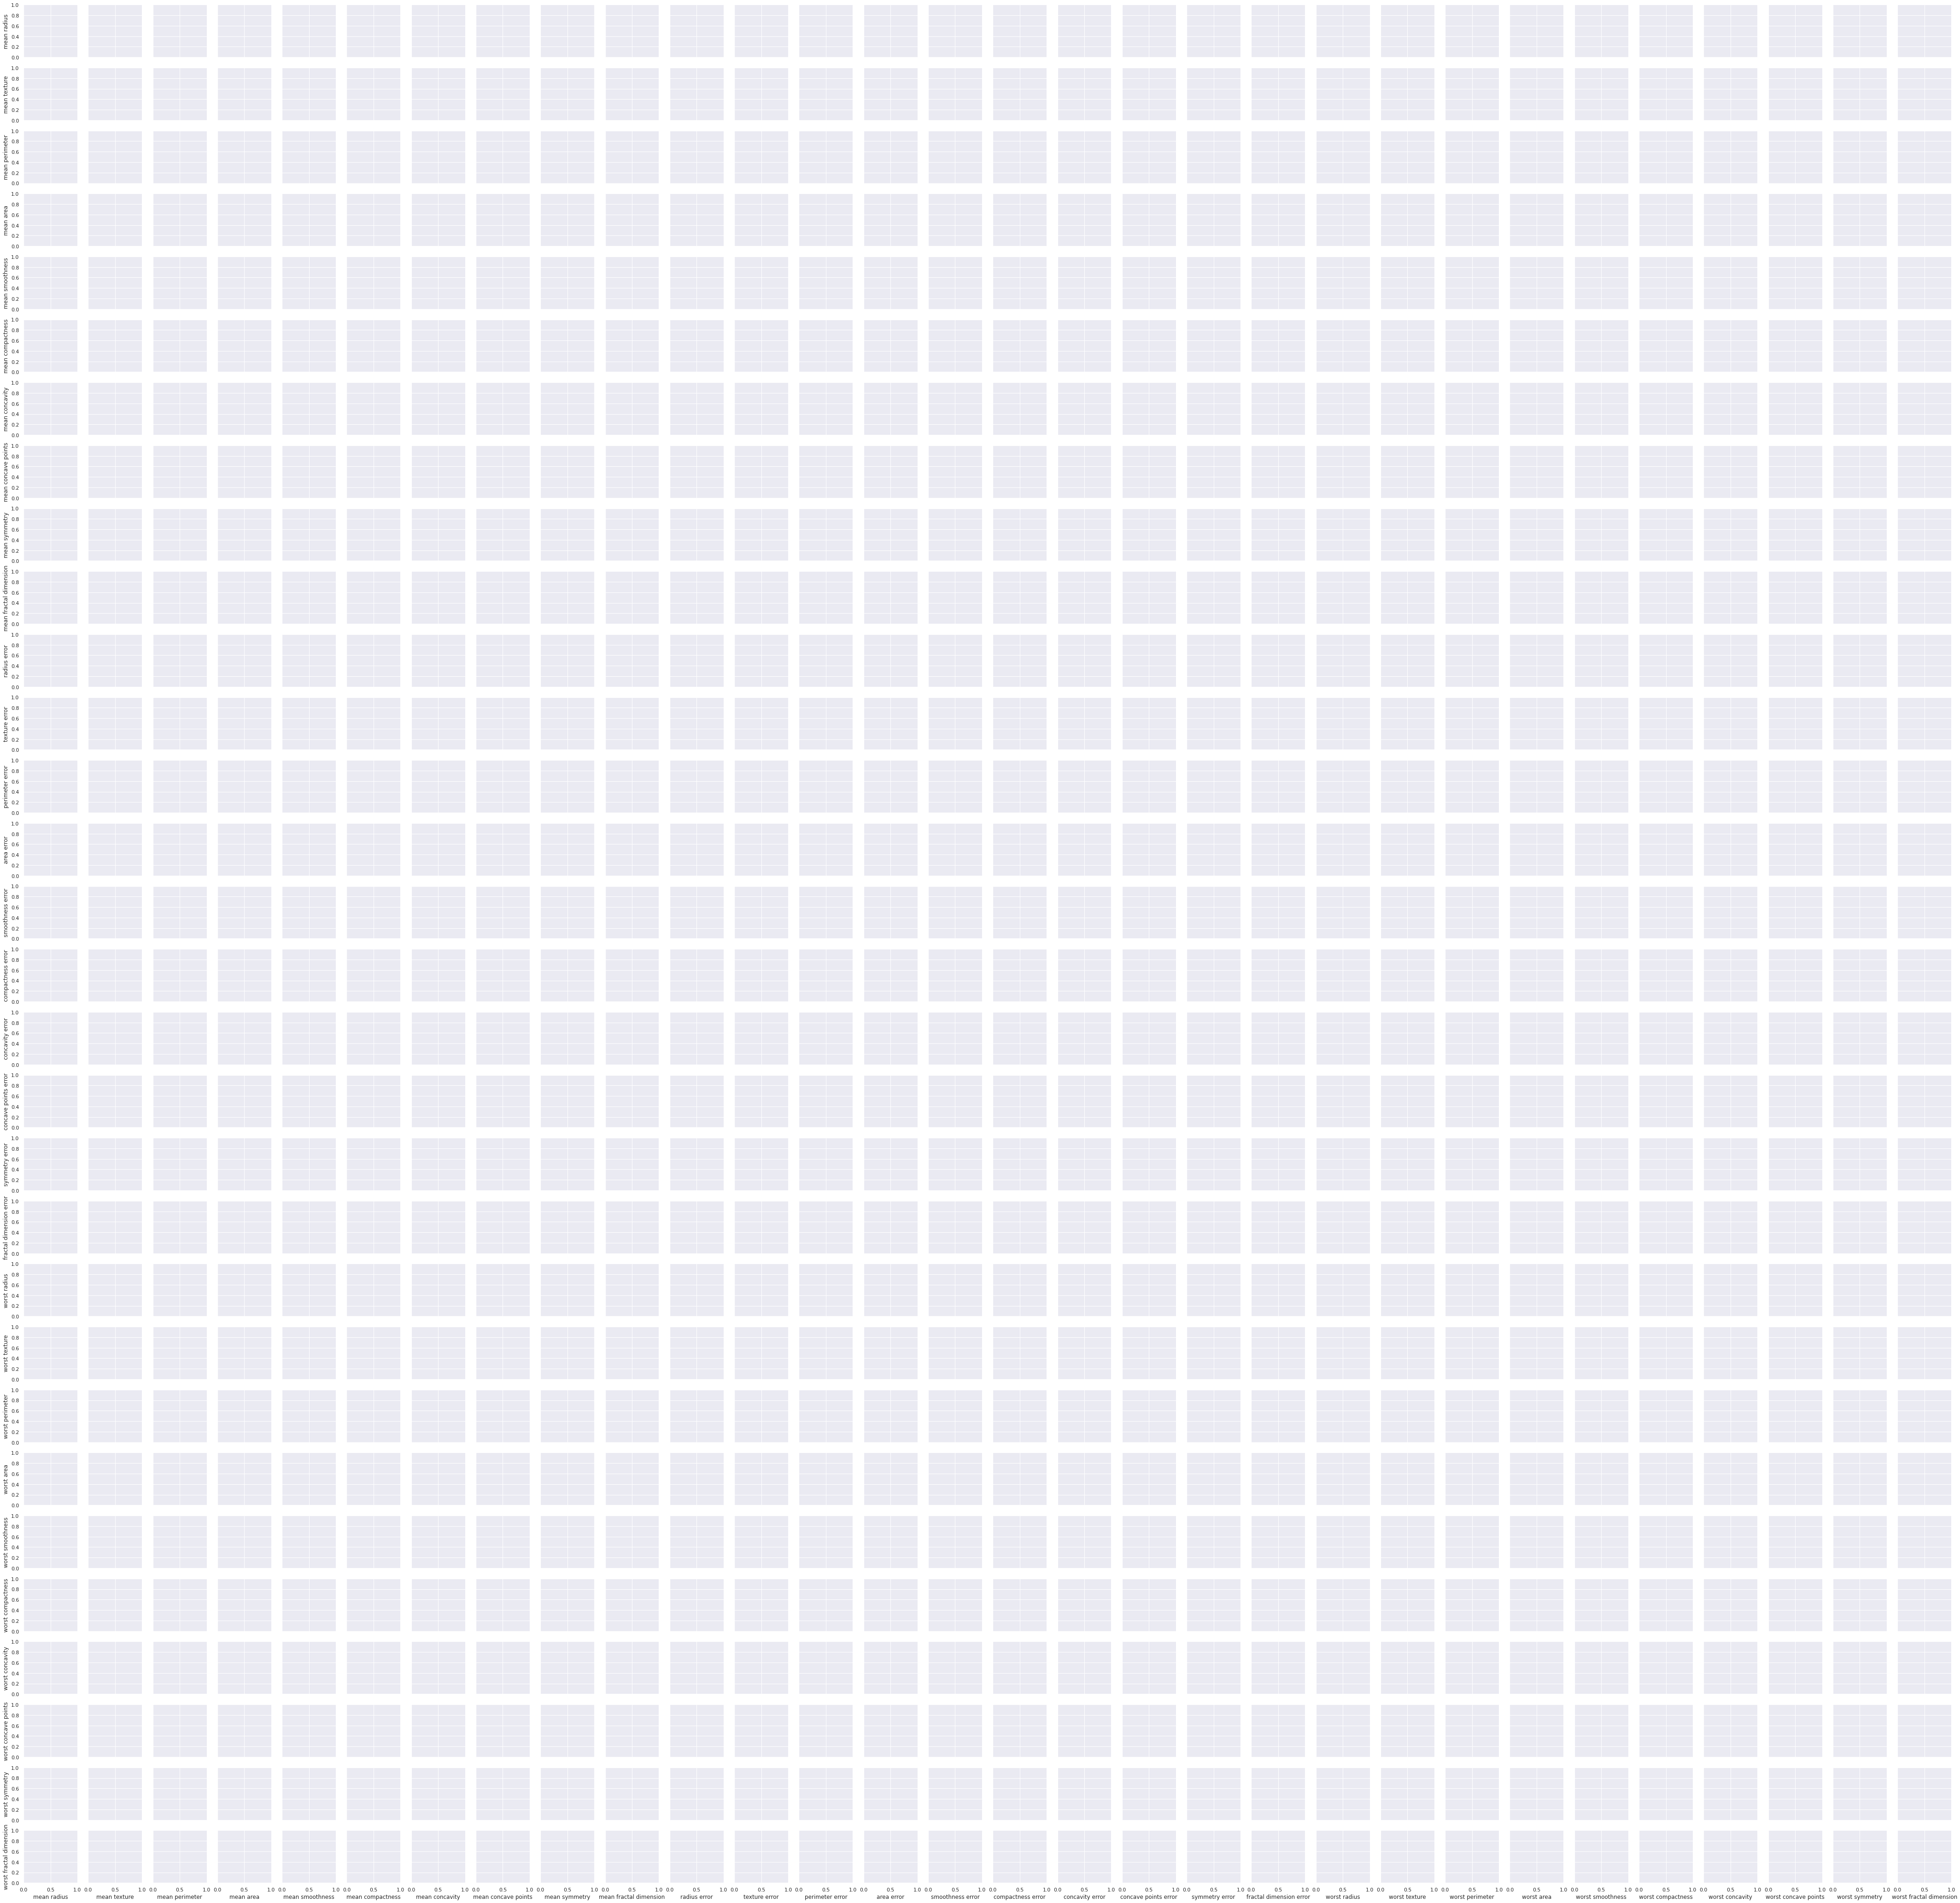

In [181]:
# bibliotecas
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# dataset para pandas dataframe
df = pd.DataFrame(cancer_mama.data,columns=cancer_mama.feature_names)
df['begin'] = cancer_mama.target

# mostra graficos
sns.pairplot(df, hue='begin', vars=cancer_mama.feature_names)
plt.show()

In [ ]:
# bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
import numpy as np

# remover warnings
import warnings
warnings.filterwarnings("ignore")

print('Para o Titanic')

scores = []
for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(td.drop('Survived',axis=1), td['Survived'])
  model = KNeighborsClassifier()
  model.fit(X_train,y_train)
  precisao = model.score(X_test,y_test)
  scores.append(precisao)

print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))

import matplotlib.pyplot as plt
import seaborn as sns
print(scores)
sns.distplot(scores)
plt.yticks([])
plt.title("Acurácias do k-NN")
plt.show()

print('\nPara o câncer de mama')

# dataset
cancer_mama = load_breast_cancer()

# caracteristicas e alvo
X = cancer_mama.data
y = cancer_mama.target

# normalizando
scaler = Normalizer()
scaler.fit(X)
X = scaler.transform(X)

scores = []
for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  model = KNeighborsClassifier()
  model.fit(X_train,y_train)
  precisao = model.score(X_test,y_test)
  scores.append(precisao)

print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))

print(scores)
sns.distplot(scores)
plt.yticks([])
plt.title("Acurácias do k-NN")
plt.show()